<a href="https://colab.research.google.com/github/gulshaniitk/air-passengers-forecasting/blob/main/arima_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# data=pd.read_csv('/content/drive/MyDrive/forecasting/AirPassengers.csv',index_col='Month',parse_dates=True,dtype='float')
# data.head()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/forecasting/AirPassengers.csv')
print(data.head())
data.info()
data['Month']=pd.to_datetime(data['Month'],infer_datetime_format=True)
data=data.set_index(['Month'])
print(data.info())
data.head()

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
None


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
ts=data['#Passengers']
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [ ]:
print(ts['1949'],'\n')

print(ts['1949-01-01'],'\n')

from datetime import datetime
ts[datetime(1950,1,1)]

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64 

112 



115

In [ ]:
ts.shift().head()

Month
1949-01-01      NaN
1949-02-01    112.0
1949-03-01    118.0
1949-04-01    132.0
1949-05-01    129.0
Name: #Passengers, dtype: float64

In [ ]:
diff=ts-ts.shift()
diff.head()

Month
1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
Name: #Passengers, dtype: float64

In [ ]:
logdiff=np.log(ts)-np.log(ts.shift())
print(logdiff.head())

logdiff.dropna(inplace=True)
logdiff.head()


Month
1949-01-01         NaN
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
Name: #Passengers, dtype: float64


Month
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
Name: #Passengers, dtype: float64

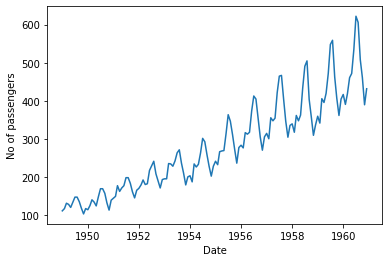

In [ ]:
plt.xlabel('Date')
plt.ylabel('No of passengers')
plt.plot(ts)

In [ ]:
# rollmean=data.rolling(window=12).mean()
# rollstd=data.rolling(window=12).std()
# orig=plt.plot(data,label='Original')
# mean=plt.plot(rollmean,label='mean')
# std=plt.plot(rollstd,label='std')
# plt.legend(loc='best')
# plt.show()

In [ ]:
def plot_graph(df):
      rollmean=df.rolling(window=12).mean()
      rollstd=df.rolling(window=12).std()
      orig=plt.plot(df,label='Original')
      mean=plt.plot(rollmean,label='mean')
      std=plt.plot(rollstd,label='std')
      plt.legend(loc='best')
      plt.show()

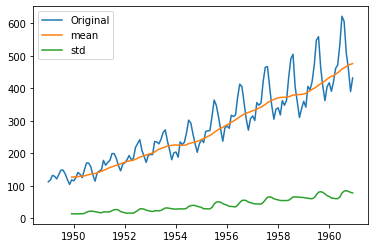

In [ ]:
plot_graph(data)

In [ ]:
from statsmodels.tsa.stattools import adfuller

#p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
#p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [ ]:
result = adfuller(data['#Passengers'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


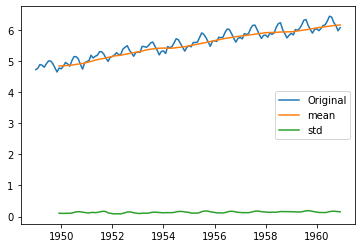

ADF Statistic: -1.717017
p-value: 0.422367
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [ ]:
#Let’s log transform the dataset again to make the distribution of values more linear and better meet the expectations of this statistical test.
plot_graph(np.log(data))
result = adfuller(np.log(ts.values))
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

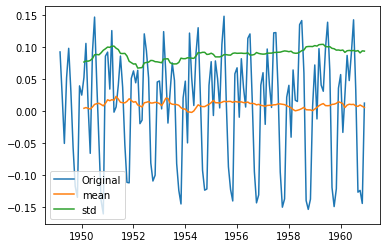

ADF Statistic: -3.040034
p-value: 0.031321
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [ ]:
data_log=np.log(data)
data_log_ma=data_log-data_log.rolling(window=3).mean()

data_log_ma.dropna(inplace=True)
plot_graph(data_log_ma)
result = adfuller(data_log_ma['#Passengers'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

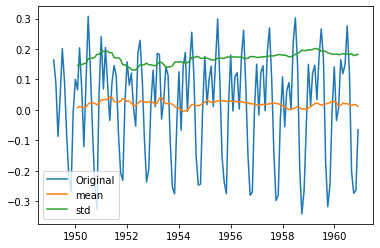

ADF Statistic: -3.167907
p-value: 0.021919
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [ ]:
data_log_diff=data_log.diff(periods=2)
data_log_diff.dropna(inplace=True)
plot_graph(data_log_diff)
result = adfuller(data_log_diff['#Passengers'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

In [ ]:
df=data.diff(periods=2)
df=df.dropna()
result = adfuller(df['#Passengers'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.961695
p-value: 0.038630
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [ ]:
df.head()

,#Passengers
Month,
1949-03-01,20.0
1949-04-01,11.0
1949-05-01,-11.0
1949-06-01,6.0
1949-07-01,27.0


In [ ]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

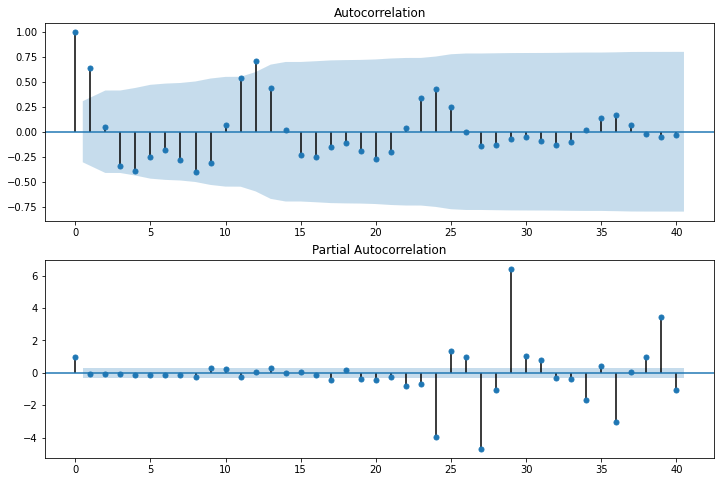

In [ ]:
lag_acf=acf(df)
lag_pacf=pacf(df)
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=plot_acf(lag_acf, lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=plot_pacf(lag_pacf, lags=40,ax=ax2)

In [ ]:
# Auto regressive,p:1 (PACF plot)
# Differentiation,d=2 (Period Size)
# Moving average,q=2  (ACF plot)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import train_test_split

In [ ]:
pip install pmdarima

     |████████████████████████████████| 1.4 MB 7.0 MB/s 
     |████████████████████████████████| 9.8 MB 20.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from pmdarima.arima import auto_arima

import warnings
warnings.filterwarnings("ignore")

In [ ]:
print(data.shape)
train=data.iloc[:-30]
test=data.iloc[-30:]
print(train.shape,test.shape)

(144, 1)
(114, 1) (30, 1)


In [ ]:
test.head()

,#Passengers
Month,
1958-07-01,491
1958-08-01,505
1958-09-01,404
1958-10-01,359
1958-11-01,310


In [ ]:
model=auto_arima(train,suppress_warnings=True)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  129
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -589.217
Date:                Wed, 16 Mar 2022   AIC                           1190.435
Time:                        04:40:22   BIC                           1207.547
Sample:                             0   HQIC                          1197.388
                                - 129                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6605      0.126      5.239      0.000       0.413       0.908
ar.L1          1.6235      0.041     39.770      0.000       1.543       1.703
ar.L2         -0.8951      0.041    -21.896      0.000      -0.975      -0.815
ma.L1         -1.8017      0.061    -29.401      0.000      -1.922      -1.682
ma.L2          0.8546      0.059     14.459      0.000       0.739       0.970
sigma2       564.9450     64.543      8.753      0.000     438.442     691.448
===================================================================================
Ljung-Box (Q):                      280.85   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.00   Prob(JB):                         0.26
Heteroskedasticity (H):               6.31   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
pred=pd.DataFrame(model.predict(n_periods=30))
pred.index=test.index
pred.columns=['prediction']
pred.head()

,prediction
Month,
1958-07-01,398.417841
1958-08-01,349.818443
1958-09-01,329.385656
1958-10-01,340.374496
1958-11-01,377.163871


In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
print('Mean Value of Predicted data ', pred.mean())
print('Mean Value of Actual data ', test['#Passengers'].mean())
rmse(pred,test)

Mean Value of Predicted data  0    385.966529
dtype: float64
Mean Value of Actual data  442.0


array([93.2849789])

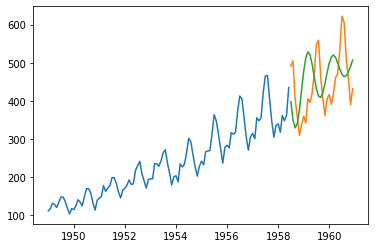

In [ ]:
plt.plot(train, label='Train')
plt.plot(test, label='Valid')
plt.plot(pred, label='Prediction')
plt.show()

(30, 1)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:

train,test=train_test_split(data,test_size=0.1,shuffle=False)

test.info()
test.head()
train.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15 entries, 1959-10-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  15 non-null     int64
dtypes: int64(1)
memory usage: 240.0 bytes


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
model=ARIMA(train,order=(1,2,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D2.#Passengers   No. Observations:                  127
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -613.296
Method:                       css-mle   S.D. of innovations             29.764
Date:                Wed, 16 Mar 2022   AIC                           1234.591
Time:                        04:56:44   BIC                           1245.968
Sample:                    03-01-1949   HQIC                          1239.213
                         - 09-01-1959                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0059      0.098      0.060      0.952      -0.186       0.198
ar.L1.D2.#Passengers     0.2790      0.090      3.104      0.002       0.103       0.455
ma.L1.D2.#Passengers    -1.0000      0.020    -50.954      0.000      -1.038      -0.962
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.5843           +0.0000j            3.5843            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict('1959-10-01', '1960-12-01')
pred

1959-10-01    72.050878
1959-11-01    20.106202
1959-12-01     5.613821
1960-01-01     1.570498
1960-02-01     0.442425
1960-03-01     0.127696
1960-04-01     0.039888
1960-05-01     0.015390
1960-06-01     0.008555
1960-07-01     0.006648
1960-08-01     0.006116
1960-09-01     0.005968
1960-10-01     0.005927
1960-11-01     0.005915
1960-12-01     0.005912
Freq: MS, dtype: float64

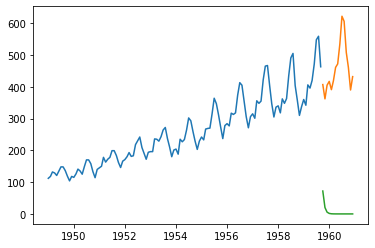

In [ ]:
plt.plot(train, label='Train')
plt.plot(test, label='Valid')
plt.plot(pred, label='Prediction')
plt.show()

In [ ]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(train,order=(4,2,1),seasonal_order=(4,2,1,12))
results=model.fit()
forecast=results.predict('1959-10-01', '1960-12-01')
forecast.head()

1959-10-01    411.894385
1959-11-01    356.035919
1959-12-01    389.127112
1960-01-01    408.183612
1960-02-01    386.805443
Freq: MS, dtype: float64

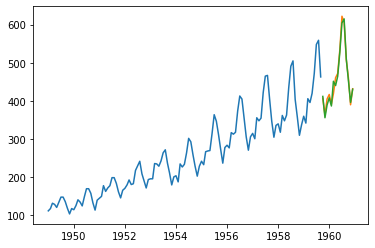

In [ ]:
plt.plot(train, label='Train')
plt.plot(test, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

In [ ]:
print('Mean Value of Predicted data ', test.mean())
print('Mean Value of Actual data ', forecast.mean())
rmse(test['#Passengers'],forecast)

Mean Value of Predicted data  #Passengers    459.2
dtype: float64
Mean Value of Actual data  456.5526132643187


12.840861712841024